## Observations and Insights 

Mouses treated with Capomulin and Ramicane regimen in average shownn the smallest tumor size as well as relatively low variance/errors.
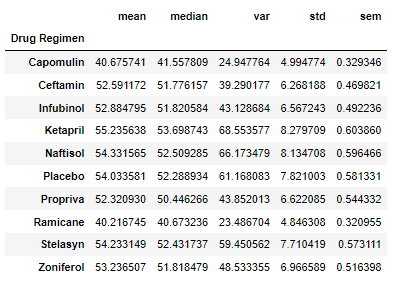

Notable tumor size decreases has been observed over time for mices treated with Capomulin 
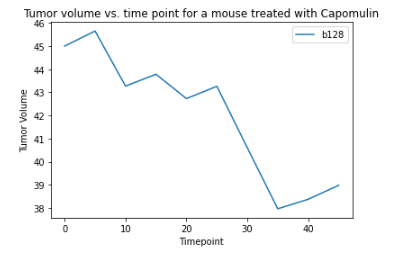
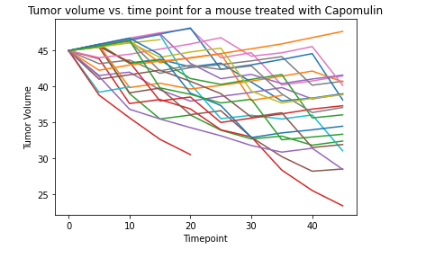

There is a high correlation between weight and the volume of tumor for mices treated with Capomulin
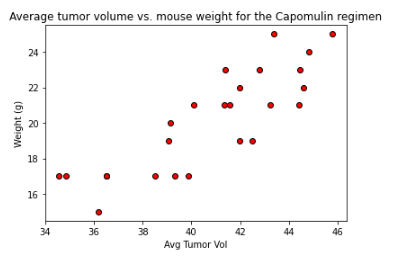


CODE

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Using inner join to remove data that's either missing a metadata or test results
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge_df["Dupe"] = merge_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
Dupe_df= merge_df.loc[merge_df["Dupe"]==True]
Dupe_Mouse_ID = Dupe_df["Mouse ID"].unique()
Dupe_Mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df["Dupe_Mice"] = merge_df["Mouse ID"].isin(Dupe_Mouse_ID)
duplicated_df= merge_df.loc[merge_df["Dupe_Mice"]==True]
duplicated_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Dupe,Dupe_Mice
107,g989,0,45.000000,0,Propriva,Female,21,26,True,True
137,g989,0,45.000000,0,Propriva,Female,21,26,True,True
329,g989,5,48.786801,0,Propriva,Female,21,26,True,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True,True
620,g989,10,51.745156,0,Propriva,Female,21,26,True,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True,True
815,g989,15,51.325852,1,Propriva,Female,21,26,True,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True,True
950,g989,20,55.326122,1,Propriva,Female,21,26,True,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df["Dupe_Mice"] = merge_df["Mouse ID"].isin(Dupe_Mouse_ID)
merge_df= merge_df.loc[merge_df["Dupe_Mice"]==False]
cleaned_df = merge_df.drop(columns=["Dupe","Dupe_Mice"])
cleaned_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_df = cleaned_df.groupby("Drug Regimen")

data_mean = grouped_df["Tumor Volume (mm3)"].mean()
data_median = grouped_df["Tumor Volume (mm3)"].median()
data_variance = grouped_df["Tumor Volume (mm3)"].var()
data_std_dev = grouped_df["Tumor Volume (mm3)"].std()
data_std_err = grouped_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
                            "Mean" : data_mean,
                            "Median" : data_median,
                            "Variance" :data_variance,
                            "Standard Deviation" :data_std_dev,
                            "Standard Error of mean" : data_std_err
                            })
summary_df


,Mean,Median,Variance,Standard Deviation,Standard Error of mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_dff_agg = grouped_df["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_dff_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of timepoints for all mice tested for each drug regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Timepoints'>

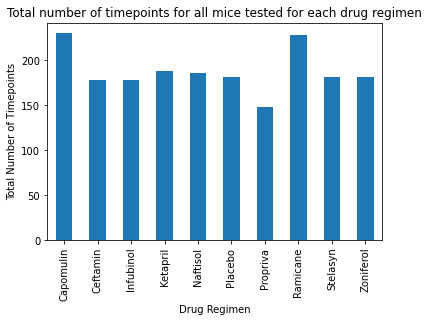

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
group = cleaned_df.groupby("Drug Regimen")
total_number_timepoints = group["Drug Regimen"].count()

total_number_timepoints.plot(kind="bar", title ="Total number of timepoints for all mice tested for each drug regimen", xlabel = "Drug Regimen", ylabel = "Total Number of Timepoints")



Text(0, 0.5, 'Total Number of Timepoints')

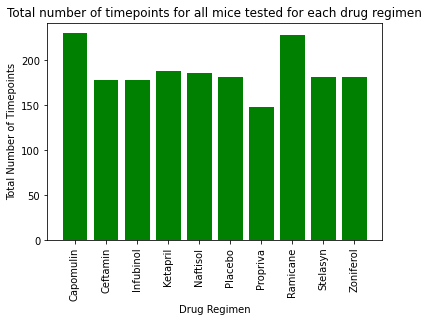

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen = total_number_timepoints.index.values
x_axis = np.arange(len(drug_regimen))
y_axis = total_number_timepoints

plt.bar(x_axis, y_axis, color="g", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_regimen, rotation=90)

plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

<AxesSubplot:ylabel='Sex'>

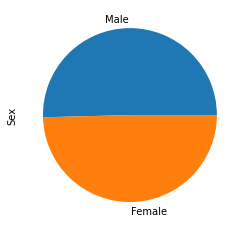

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_unique_mouse_df = cleaned_df.drop_duplicates(subset=["Mouse ID"])
gender_df = cleaned_unique_mouse_df["Sex"].value_counts()

gender_df.plot(kind="pie")


([<matplotlib.patches.Wedge at 0x23f9b6607f0>,
 [Text(-0.696335501700647, -0.8515379434125696, 'Male'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female')],
 [Text(-0.3798193645639892, -0.46447524186140154, '50.4%'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6%')])

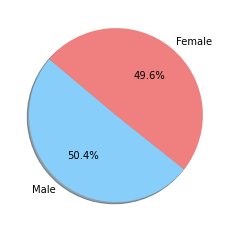

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_df.index.values
colors = ["lightskyblue", "lightcoral"]
plt.pie(gender_df, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# # Start by getting the last (greatest) timepoint for each mouse
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

list_treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

cleaned_indexed_df = cleaned_df.set_index("Drug Regimen")
final_df = cleaned_indexed_df.loc[list_treatment]



# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Sorting the dataframe by Mouse ID and Timepoint ascending order to allow timepoint to be at the bottom of each mouse
final_sort_df = final_df.sort_values(["Mouse ID", "Timepoint"], ascending=True)

# Removing duplicates and leaving the last occurrence of each set within each duplicated mouse IDs
final_last_df = final_sort_df.drop_duplicates(subset=["Mouse ID"], keep='last')
final_last_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Infubinol,a203,45,67.973419,2,Female,20,23
Infubinol,a251,45,65.525743,1,Female,21,25
Ceftamin,a275,45,62.999356,3,Female,20,28
Ramicane,a411,45,38.407618,1,Male,3,22
Ramicane,a444,45,43.047543,0,Female,10,25
...,...,...,...,...,...,...,...
Ceftamin,y769,45,68.594745,4,Female,6,27
Capomulin,y793,45,31.896238,2,Male,17,17
Ceftamin,y865,45,64.729837,3,Male,23,26


9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64
3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    22.050126
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
94    44.183451
98    30.638696
Name: Tumor Volume (mm3), dtype: float64
0     67.973419
1     65.525743
6     57.031862
8     66.083066
14    72.226731
15    36.321346
18    60.969711
20    

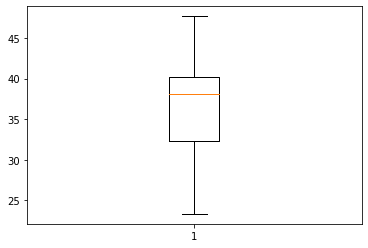

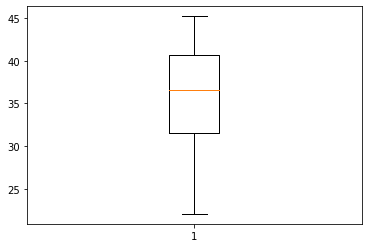

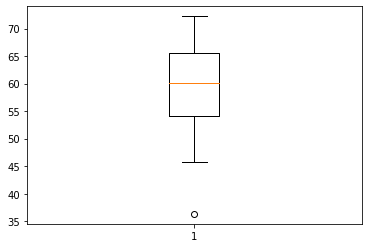

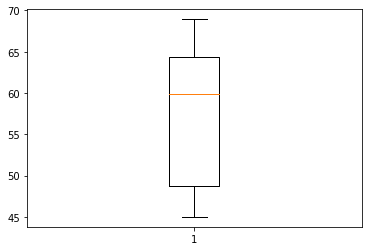

In [27]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

final_last_df.reset_index(level=0, inplace=True)
  
for treatment in list_treatment:
    treatment_sample=final_last_df.loc[final_last_df["Drug Regimen"]==treatment]
    tumor=treatment_sample["Tumor Volume (mm3)"]
    fig1, ax1 = plt.subplots()
    ax1.boxplot(tumor)
    print(tumor)
    
    
# ax1.set_title("Tumor Volume (mm3)")
# ax1.set_ylabel("tumor volume of each mouse across four of the treatment")  

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df= cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]

#Drawing line plot for all mouses treaded with Capomulin
mouse_ID = Capomulin_df["Mouse ID"].unique()
for mice in mouse_ID:
    sample=Capomulin_df.loc[Capomulin_df["Mouse ID"]==mice]
    plt.plot(sample["Timepoint"],sample["Tumor Volume (mm3)"])

plt.title("Tumor volume vs. time point for a mouse treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

In [ ]:
#Drawing selected mouses ID "b128" treated with Capomulin
sample=Capomulin_df.loc[Capomulin_df["Mouse ID"]=="b128"]
plt.plot(sample["Timepoint"],sample["Tumor Volume (mm3)"], label="b128")

plt.legend(loc="best")
plt.title("Tumor volume vs. time point for a mouse treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df= cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"] 

Capomulin_grouped_df = Capomulin_df.groupby("Mouse ID")
Capomulin_grouped_Tumor= Capomulin_grouped_df["Tumor Volume (mm3)"].mean()
Capomulin_grouped_Tumor_df = pd.DataFrame({"Avg Tumor Vol" : Capomulin_grouped_Tumor})

Capomulin_merge_df = pd.merge(Capomulin_grouped_Tumor_df, mouse_metadata,  on="Mouse ID", how="inner")

Capomulin_filtered_df = Capomulin_merge_df.loc[:,["Mouse ID", "Avg Tumor Vol", "Weight (g)"]]
# print(Capomulin_filtered_df)

plt.scatter(Capomulin_filtered_df["Avg Tumor Vol"], Capomulin_filtered_df["Weight (g)"], marker="o", facecolors="red", edgecolors="black")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel('Avg Tumor Vol')
plt.ylabel('Weight (g)')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculating correlation coefficient using pearsonr
correlation = st.pearsonr(Capomulin_filtered_df["Avg Tumor Vol"],Capomulin_filtered_df["Weight (g)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


# linear regression model 
x_values = Capomulin_filtered_df["Avg Tumor Vol"]
y_values = Capomulin_filtered_df["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(Capomulin_filtered_df["Avg Tumor Vol"], Capomulin_filtered_df["Weight (g)"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(36,24),fontsize=10,color="black")
plt.title("correlation coefficient and linear regression model")
plt.xlabel('Avg Tumor Vol')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
